# Linear Regression using Tensorflow

### Problem Description :

Dataset consists of variables 'Country' and 'GDP'and using these variables need to find out 'Life Expectancy'.
Both 'GDP' and 'Country' variables are float values.

### 1 Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

### 2. Load Data

In [2]:
data = pd.read_csv("Reg_data.csv")

In [3]:
data.head()

,Country,GDP,Life_expectancy
0,Vietnam,2.343,74.828244
1,Vanuatu,3.123,70.819488
2,Thailand,6.593,73.927659
3,Solomon Islands,2.132,67.465195
4,Samoa,4.360,72.306390


<br>Note :
<br>1. X(Given) variable : "GDP"
<br>2. Y(Prediction) variable : "Life_Expectancy"
<br>3. "Country" variable is not helpful. Hence can be vomitted.

In [4]:
data1 = data.drop(["Country"], axis=1).as_matrix()

C:\Users\shashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [5]:
n_samples = len(data1)

In [6]:
print("No of observations : ", n_samples)
print("Shape of dataframe : ", data1.shape)

No of observations :  92
Shape of dataframe :  (92, 2)


### 3. Initialize Variables and Placeholders of Tensorflow

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [12]:
Y_predicted = w * X + b
loss = tf.square(Y - Y_predicted, name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0003).minimize(loss)

### 4. Run model

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #train model
    for i in range(500):   # no of epochs
        total_loss = 0
        for x,y in data1:  # for every observation
            _, mloss = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += mloss
            
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))  # MSE for each epoch
    w_out, b_out = sess.run([w, b])

Epoch 0: 2403.0548671846805
Epoch 1: 1279.757088885683
Epoch 2: 1126.3288815663723
Epoch 3: 1074.2354507890084
Epoch 4: 1033.8233222366998
Epoch 5: 995.9178260976206
Epoch 6: 959.5667302621448
Epoch 7: 924.6344878126907
Epoch 8: 891.0611358033898
Epoch 9: 858.7940441186985
Epoch 10: 827.7825645352511
Epoch 11: 797.9779574591262
Epoch 12: 769.3329832553762
Epoch 13: 741.8023290087104
Epoch 14: 715.3427471043947
Epoch 15: 689.9126313374094
Epoch 16: 665.4718799842117
Epoch 17: 641.9819708891104
Epoch 18: 619.4055498427023
Epoch 19: 597.7075398736026
Epoch 20: 576.853381940852
Epoch 21: 556.8103827921593
Epoch 22: 537.5469295972067
Epoch 23: 519.0325863529806
Epoch 24: 501.23837833527637
Epoch 25: 484.1360757122545
Epoch 26: 467.69867887283147
Epoch 27: 451.9004126563668
Epoch 28: 436.71650184480393
Epoch 29: 422.12291324899894
Epoch 30: 408.0968489880957
Epoch 31: 394.61585845454067
Epoch 32: 381.6588894824457
Epoch 33: 369.20543820846257
Epoch 34: 357.23608109780145
Epoch 35: 345.731800

Epoch 288: 60.309175737161674
Epoch 289: 60.30819681626947
Epoch 290: 60.30725407321006
Epoch 291: 60.30639812459602
Epoch 292: 60.30550554394722
Epoch 293: 60.30471989556985
Epoch 294: 60.30386910376989
Epoch 295: 60.30305897703637
Epoch 296: 60.3022779142889
Epoch 297: 60.30154713826335
Epoch 298: 60.3007967673728
Epoch 299: 60.30001670749777
Epoch 300: 60.29944772406927
Epoch 301: 60.2987268164187
Epoch 302: 60.29805197599141
Epoch 303: 60.29749610040175
Epoch 304: 60.29675480743627
Epoch 305: 60.2962347727026
Epoch 306: 60.29569670452696
Epoch 307: 60.29500499096416
Epoch 308: 60.294516706677236
Epoch 309: 60.294041863926076
Epoch 310: 60.29344405659029
Epoch 311: 60.292921497891456
Epoch 312: 60.29247027068682
Epoch 313: 60.29191457767688
Epoch 314: 60.291517863616995
Epoch 315: 60.291079979187444
Epoch 316: 60.290614490235306
Epoch 317: 60.290208365322776
Epoch 318: 60.28978920209667
Epoch 319: 60.28936861204388
Epoch 320: 60.28896311557163
Epoch 321: 60.28859817989819
Epoch 322:

In [16]:
print("After 500 epochs w value is :", w_out)
print("AFtere 500 epochs b value is :", b_out)

After 500 epochs w value is : 1.570532
AFtere 500 epochs b value is : 57.69224


### 5. Plot Graph

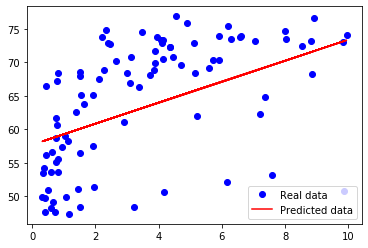

In [18]:
plt.plot(data1[:,0], data1[:,1], 'bo', label='Real data')
plt.plot(data1[:,0], data1[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

### 6. Performance Metrics

In [19]:
actual = data1[:, 1]
predicted = data1[:, 0] * w_out + b_out

In [20]:
import sklearn.metrics as metrics

In [22]:
r2_error = metrics.r2_score(actual, predicted)
print("R square error :", r2_error)

R square error : 0.26912339465144497


In [23]:
mape = np.mean(np.abs((actual-predicted))/actual) # mean absolute percentage error
print("Mean Absolute Percentage Error :", mape)

Mean Absolute Percentage Error : 0.10924979720402588
